In [1]:
from importlib import reload
import flymovie as fm
import cnn_models.siamese_cnn as cn
import cnn_models.evaluate_models as ev
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from importlib import reload
from sklearn.manifold import TSNE
import scipy.ndimage as ndi
import skimage as ski
%load_ext autoreload
%autoreload 2

In [2]:
def dists_arr_to_row(arr, row):
    dists_sq = np.sum((arr - row) ** 2, axis=1)
    dists = np.sqrt(dists_sq)
    return dists

def dist_to_center(ref_arr, arr):
    center = ref_arr.mean(axis=0)
    sqdist = np.sum((arr - center) ** 2, axis=1)
    return np.sqrt(sqdist)

def find_in_radius(em1, files1, em2, files2, r):
    good_files = []
    for i in range(len(files1)):
        if i % 250 == 0:
            print(i)

        dists = dists_arr_to_row(em2, em1[i])
        good_uns = dists <= r
        #good_files1 = np.array(files1)[good_uns]
        good_files_this = list(np.array(files2)[good_uns])
        good_files = good_files + good_files_this

    return np.unique(good_files)

def find_in_radius_center(em1, files1, em2, files2, r):
    good_files = []
    center = np.mean(em1, axis=0)
    for i in range(len(files2)):
        if i % 250 == 0:
            pass
            #print(i)

        dist = np.sqrt(np.sum((center - em2[i]) ** 2))
        if dist <= r:
            good_files.append(files2[i])

    return np.unique(good_files)

def d_pairwise_all(em1, em2):
    d = []
    for i in range(len(em2)):
        d_ = list(dists_arr_to_row(em1, em2[i]))
        d = d + d_
    return d

def norm(x):
    mean_ = np.mean(x[x>0])
    return x / mean_ * 1000

def make_df(files):
    p = []
    for f in files:
        #print(f.split('_')[])

        p.append(f.split('_')[1:-1])

    p = np.array(p)
    p = p.astype(float) 
    return pd.DataFrame(p, columns=['ntotal', 'hlb_diam','hlb_nmols', 'n_clusters', 'cluster_diam_mean', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma'])


(182, 9)


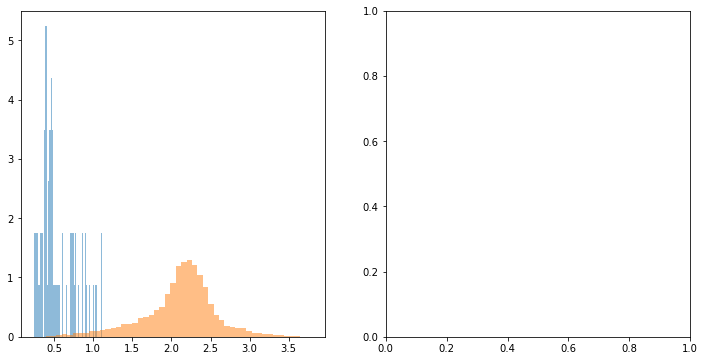

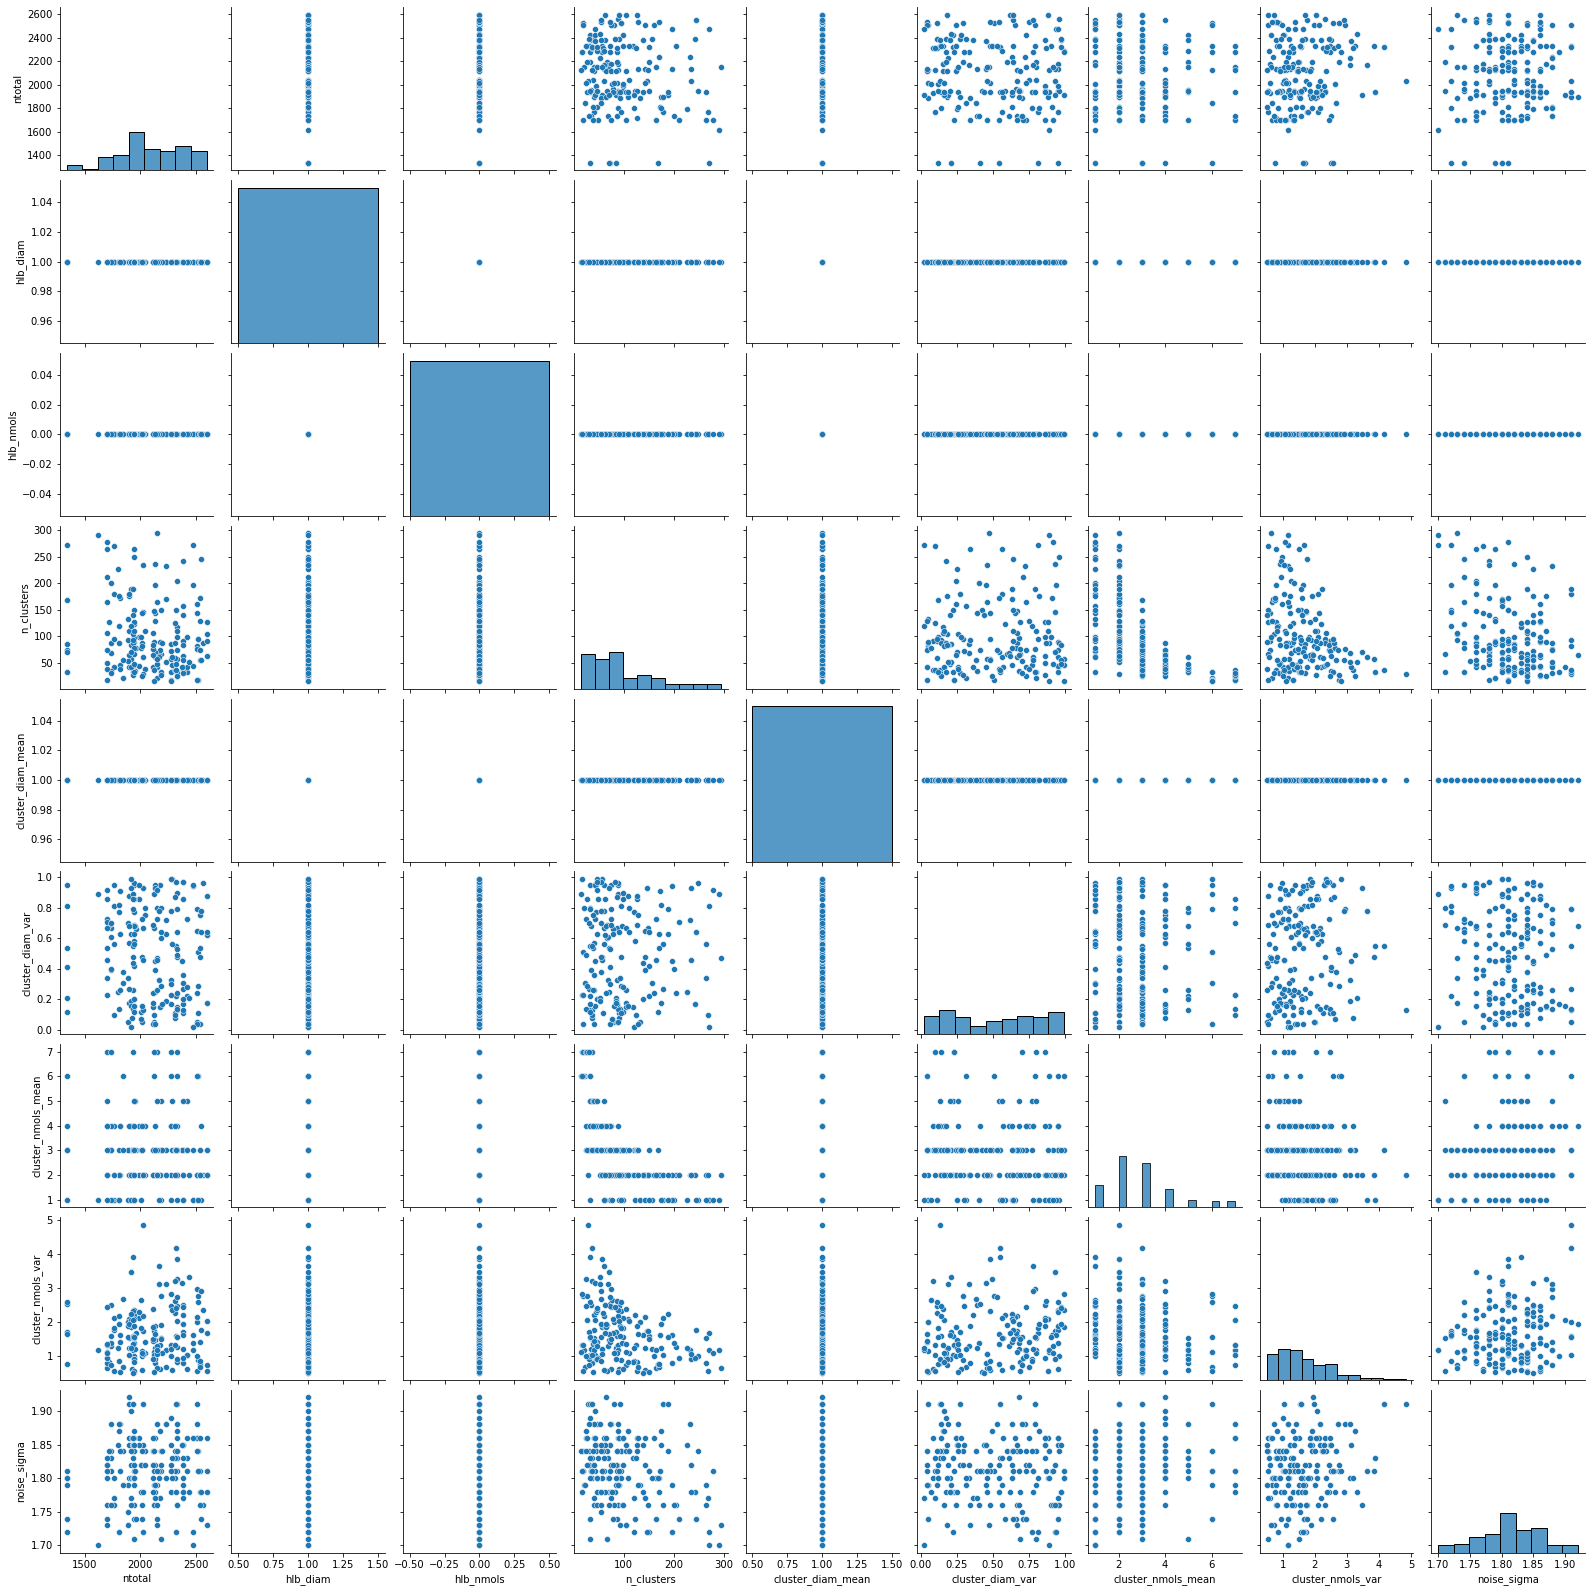

In [4]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-wt-early13__realreal__realreal_realsim_20220517_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-earlync13-val_UjbwPCLC__checkpoint_final_realreal__realreal_realsim_20220517_34layer.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 0.8))
print(df.shape)
sn.pairplot(df)

0
(385, 9)


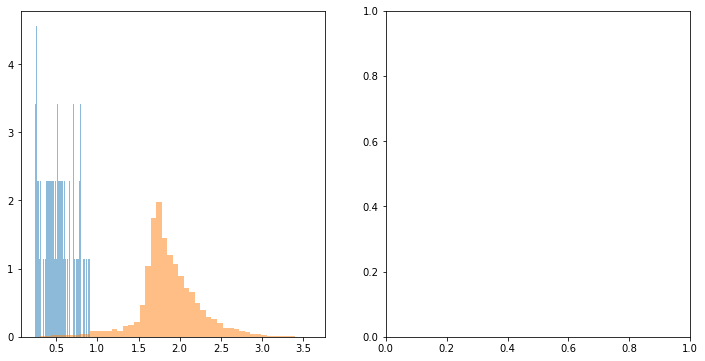

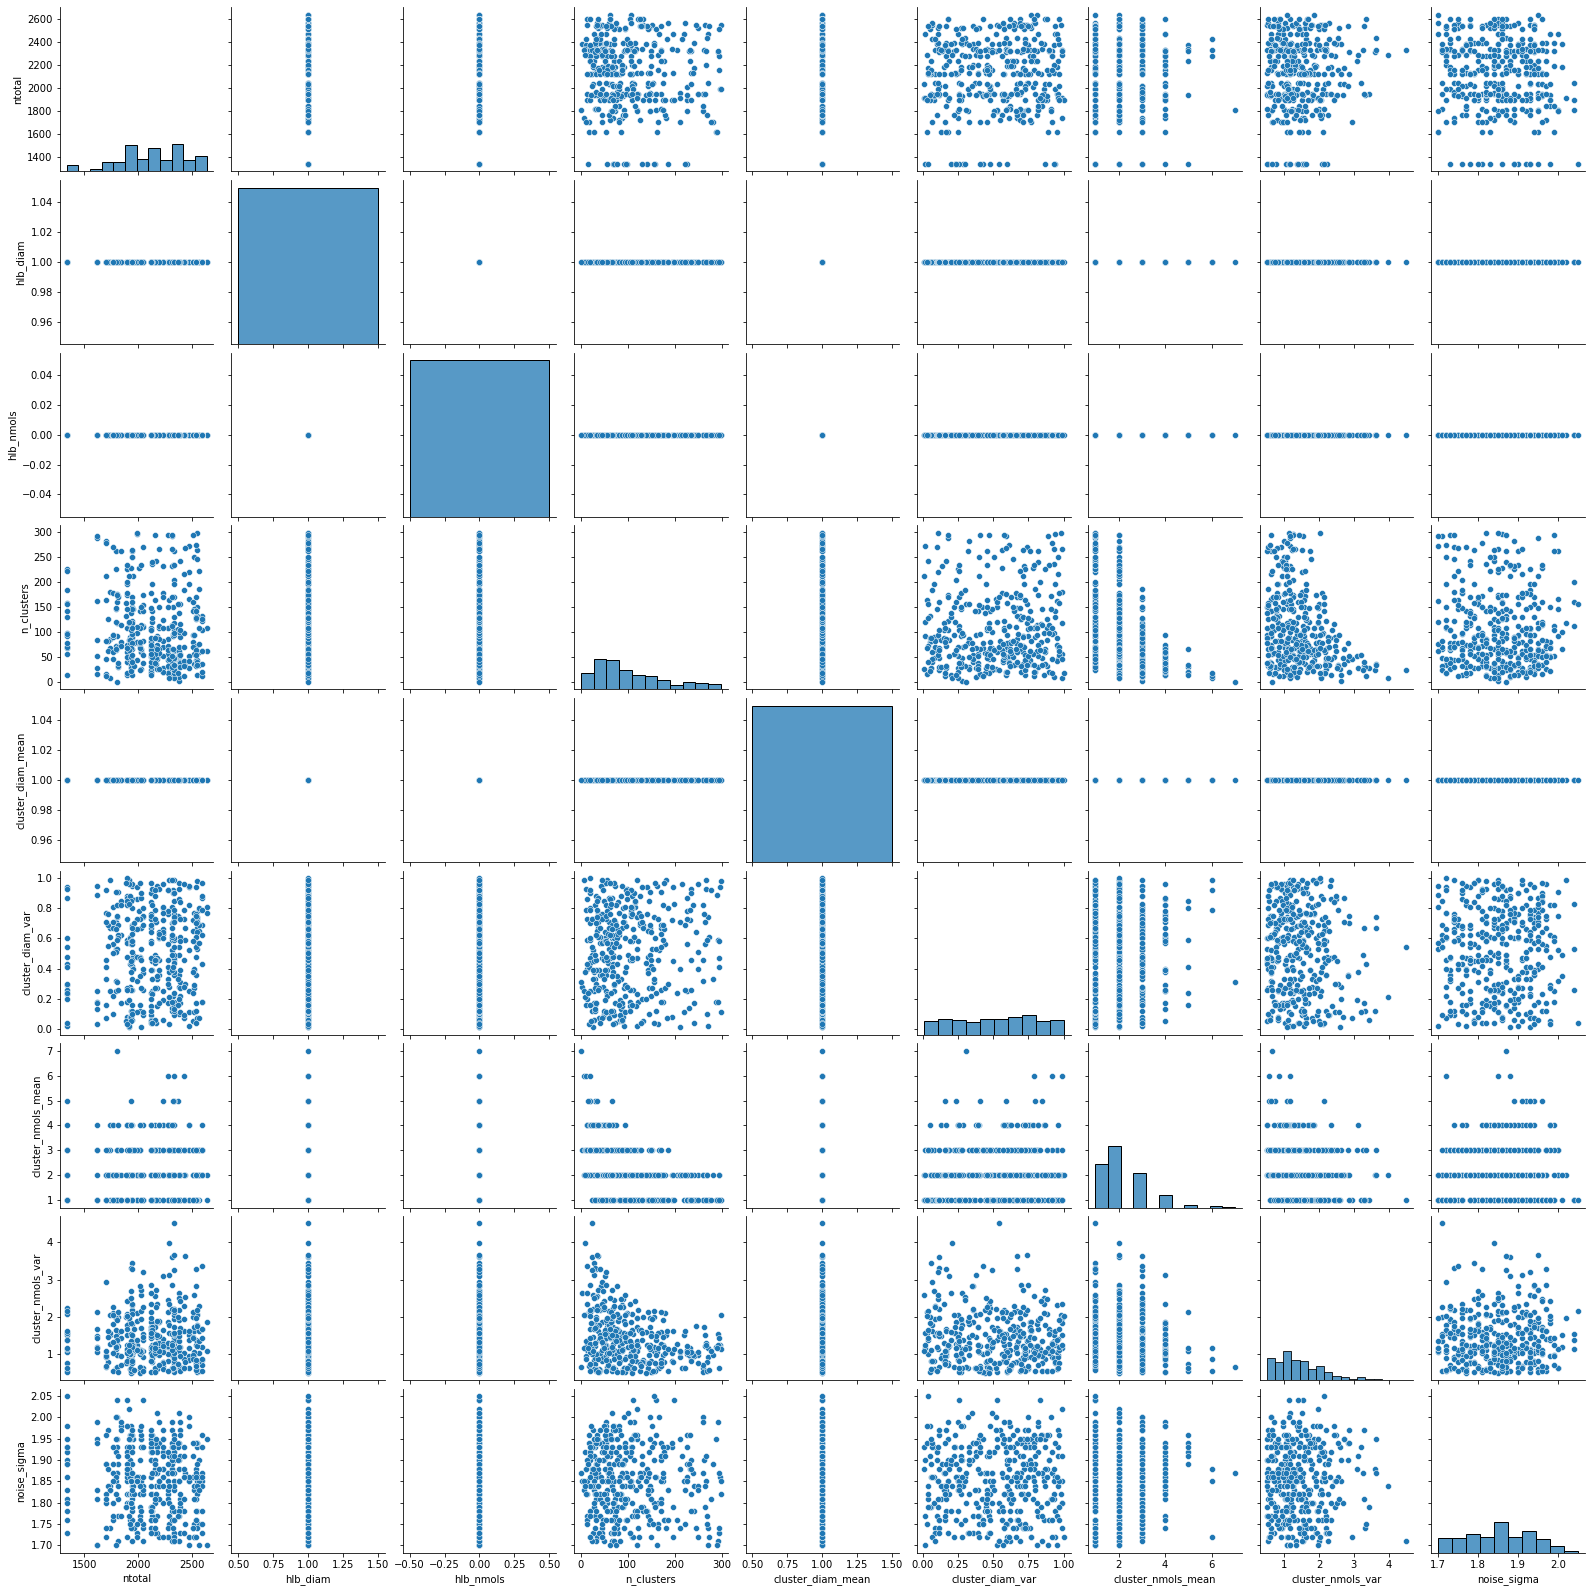

In [18]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-wt-early13__realreal__realreal_realsim_20220517_34layer_2xtrain.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-earlync13-val_UjbwPCLC__checkpoint_final_realreal__realreal_realsim_20220517_34layer_2xtrain.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius(em1, files1, em2, files2, 0.6))
print(df.shape)
sn.pairplot(df)

(509, 9)


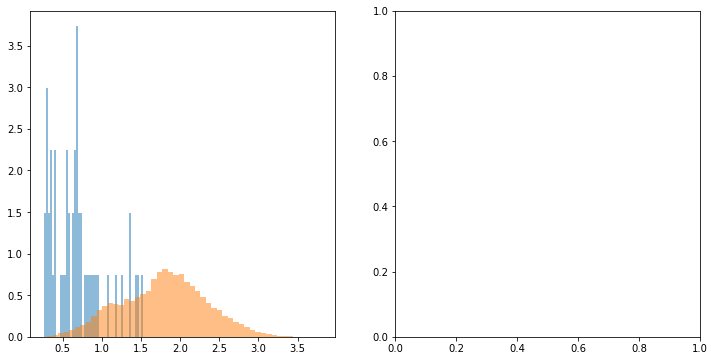

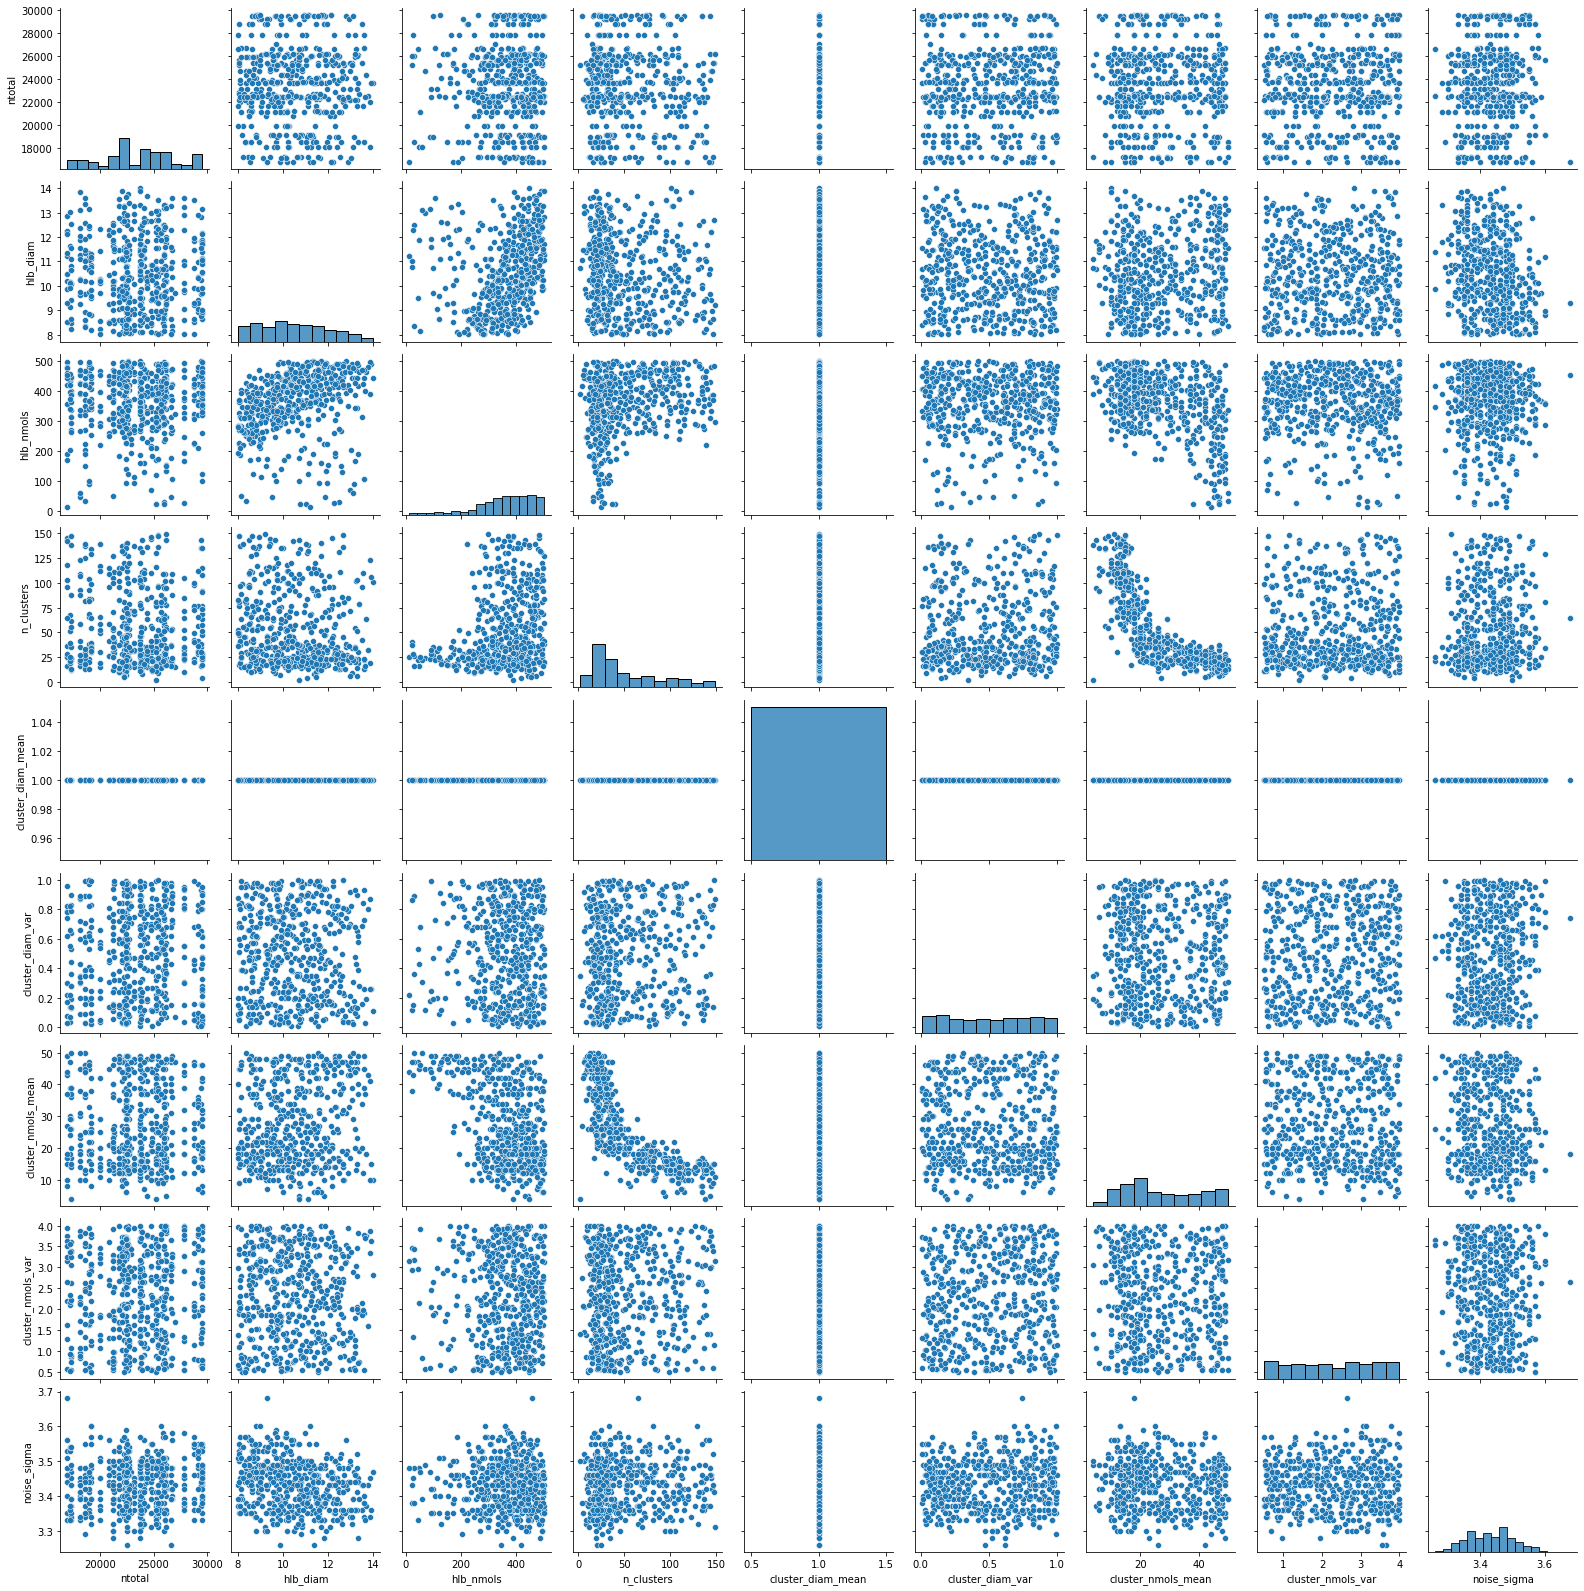

In [13]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-2__realreal__realreal_realsim_20220517_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-val_pjOKQDXm__checkpoint_final_realreal__realreal_realsim_20220517_34layer.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 0.8))
print(df.shape)
sn.pairplot(df)

0
(249, 9)


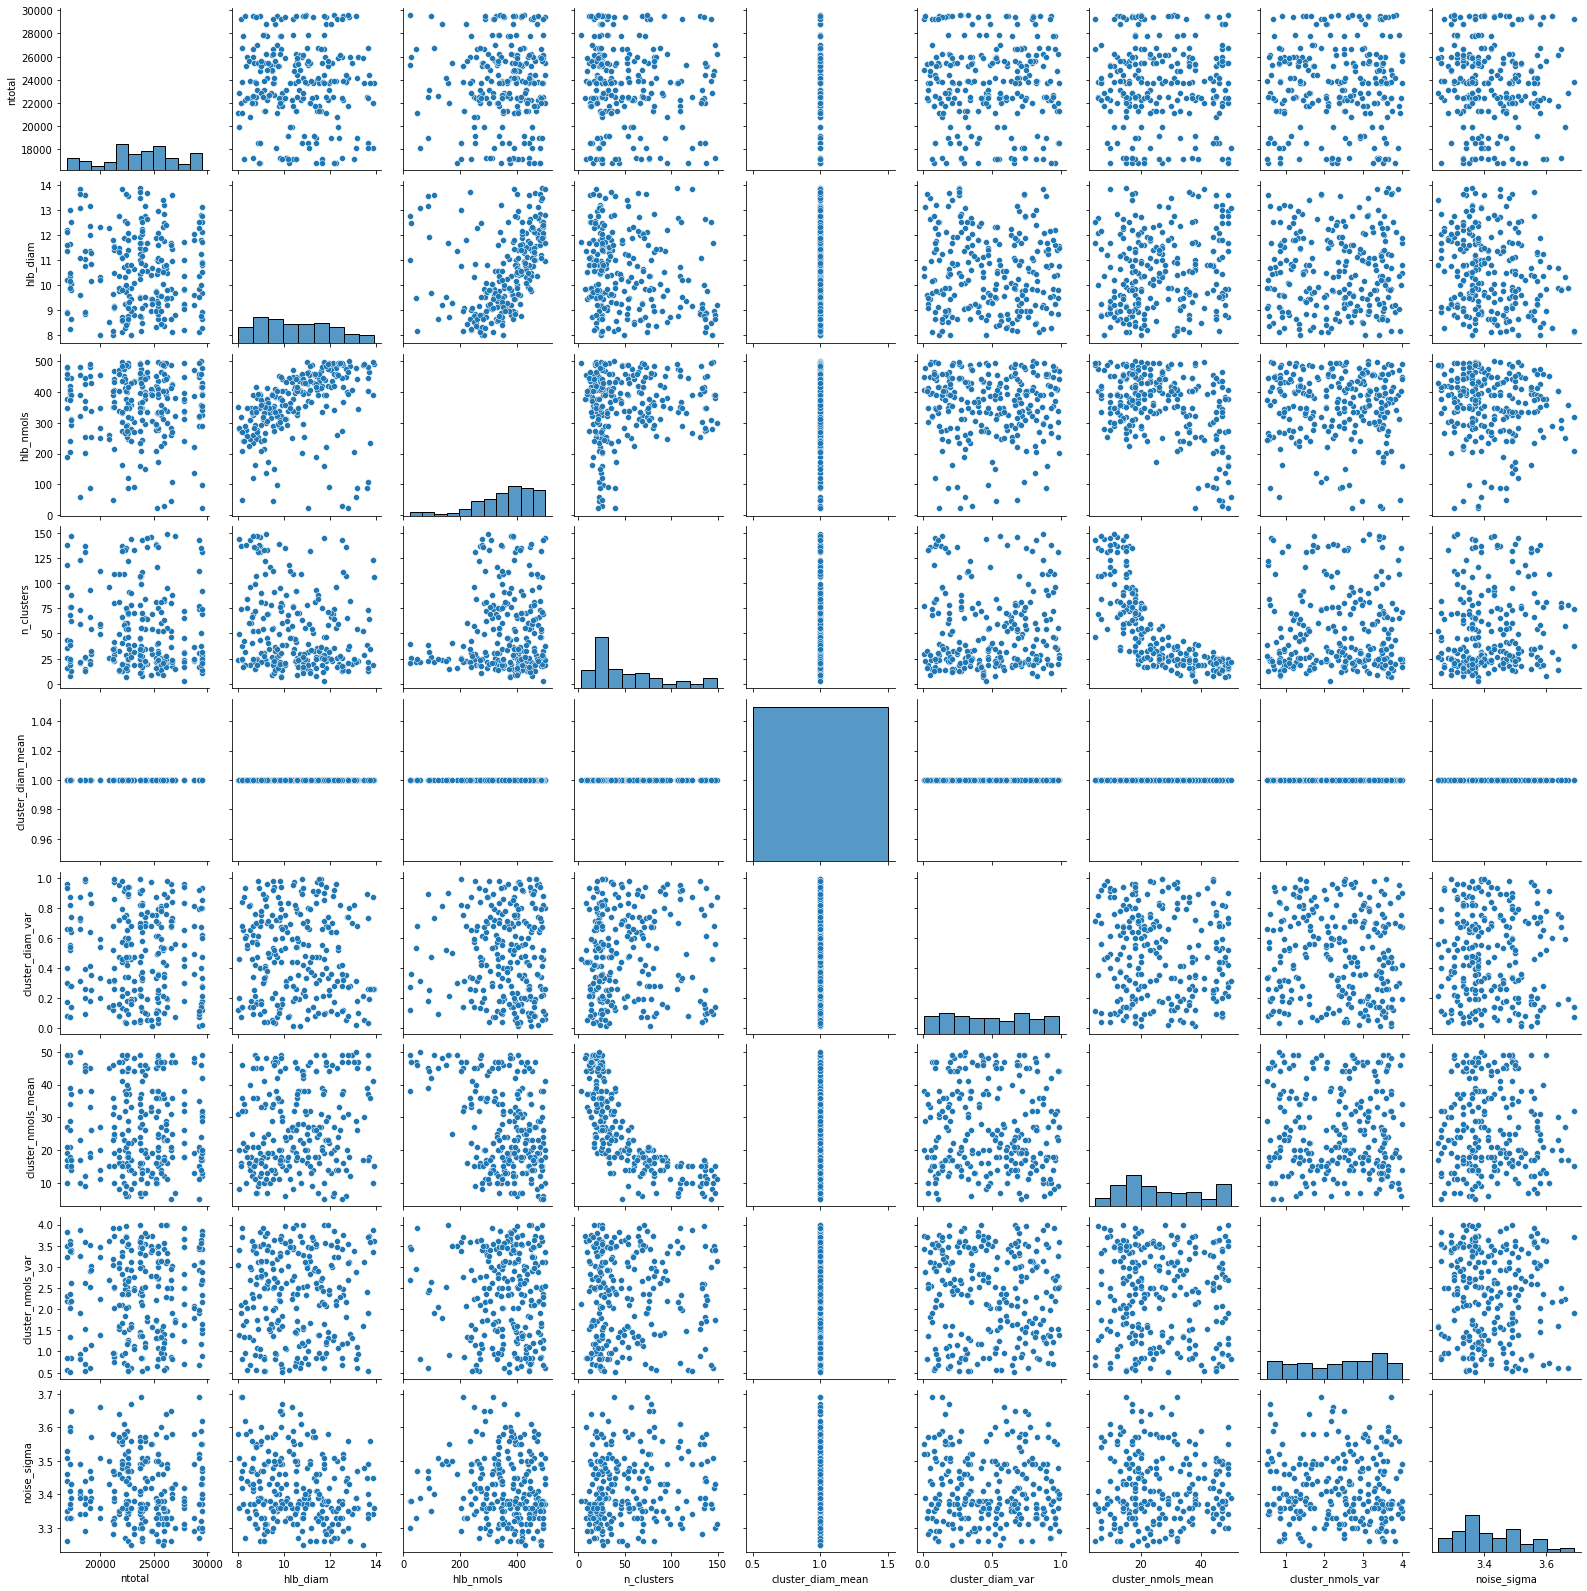

In [17]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-2__realreal__realreal_realsim_20220517_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-val_pjOKQDXm__checkpoint_final_realreal__realreal_realsim_20220517_34layer.pkl') 

df = make_df(find_in_radius(em1, files1, em2, files2, 0.4))
print(df.shape)
sn.pairplot(df)

0
(461, 9)


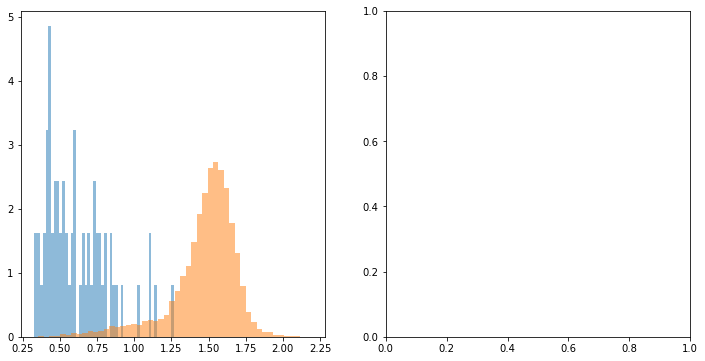

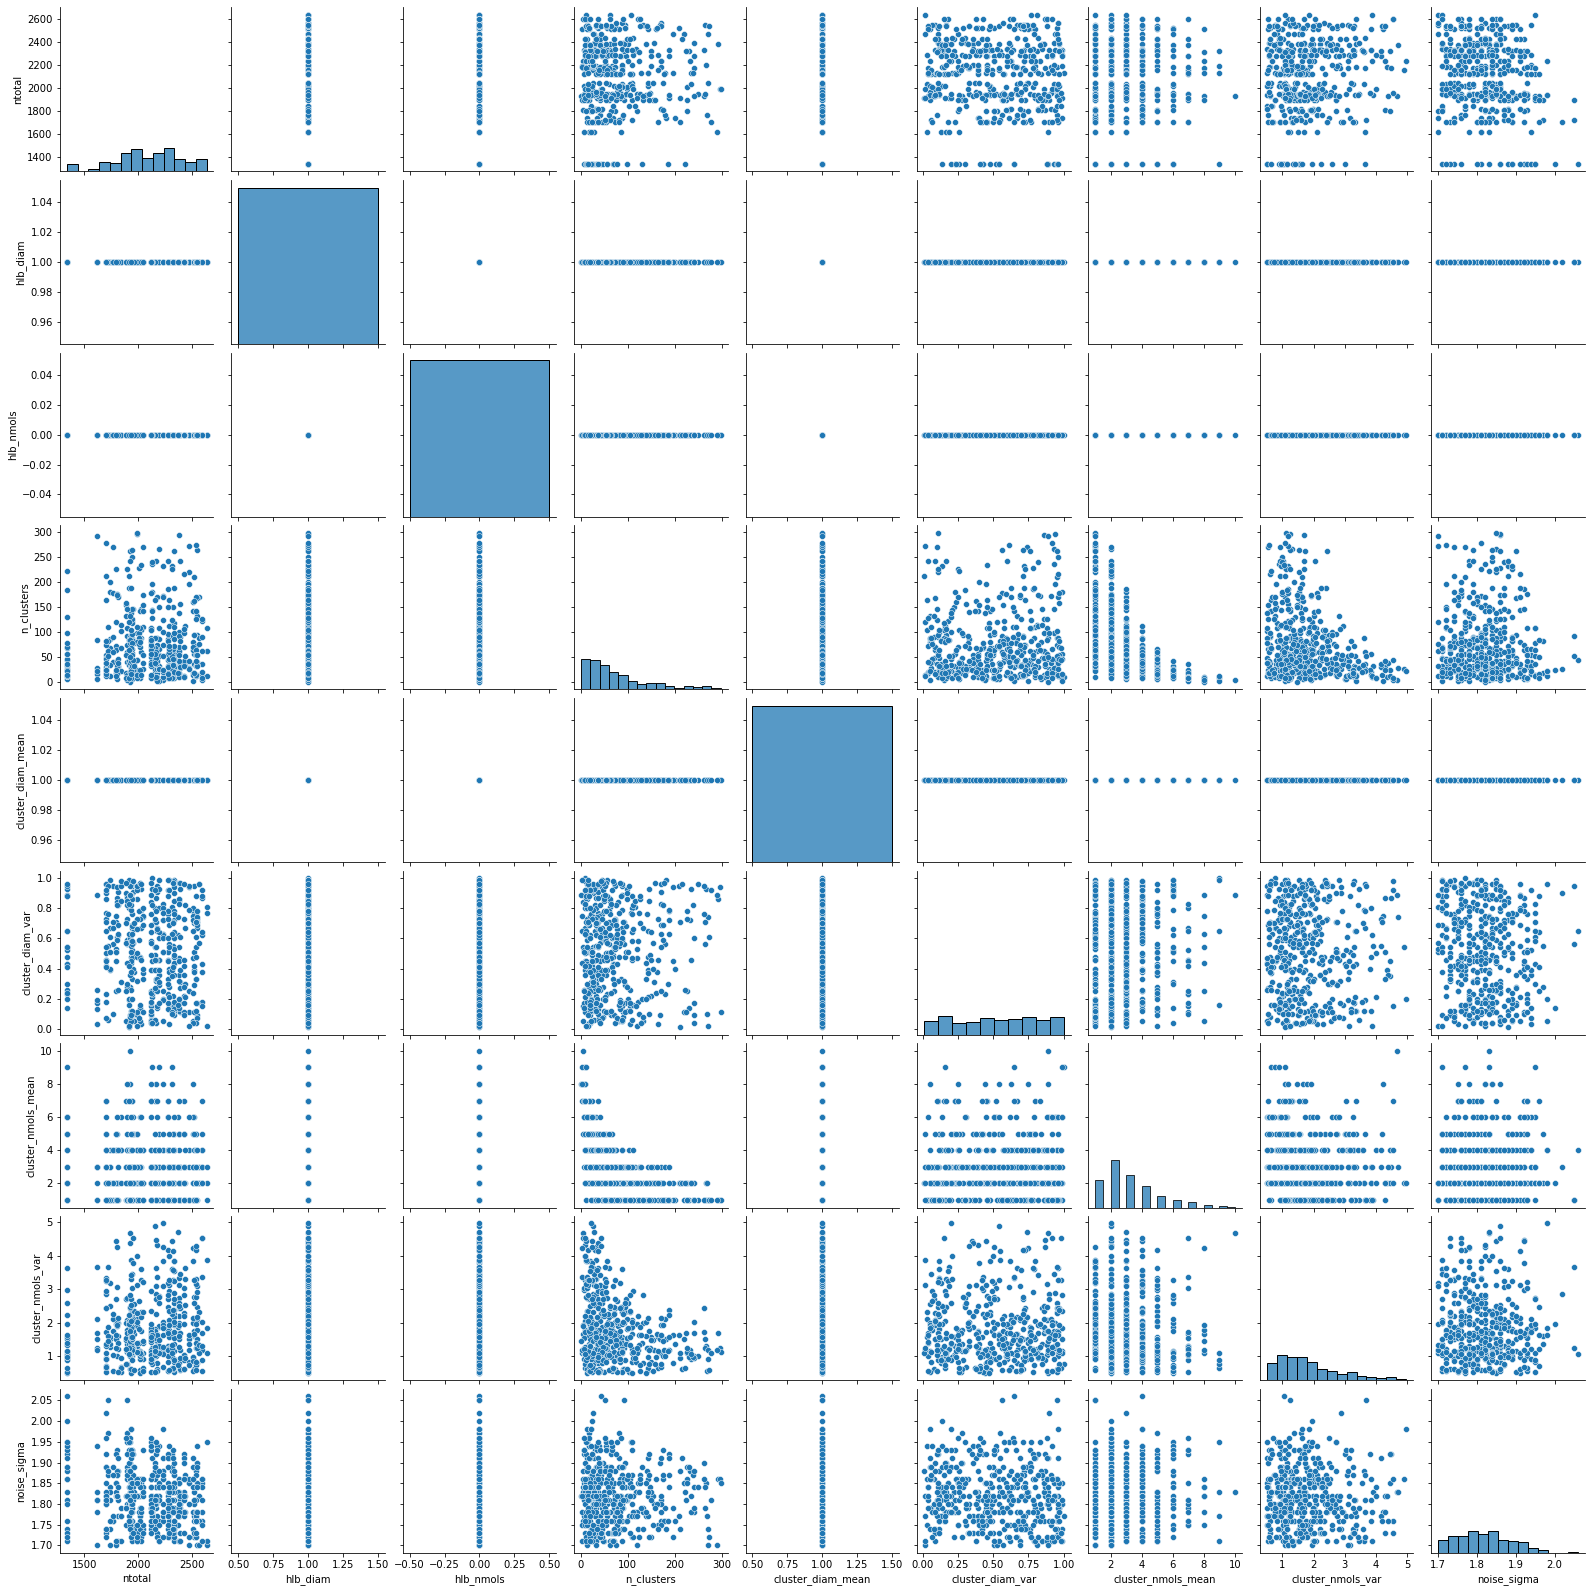

In [19]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-wt-early13__20220601-realreal-simsim__20220529-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-earlync13-val_UjbwPCLC__20220601-realreal-simsim__20220529-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius(em1, files1, em2, files2, 0.6))
print(df.shape)
sn.pairplot(df)

0
(699, 9)


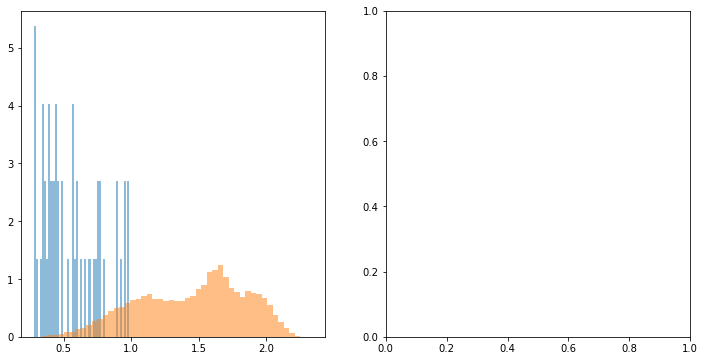

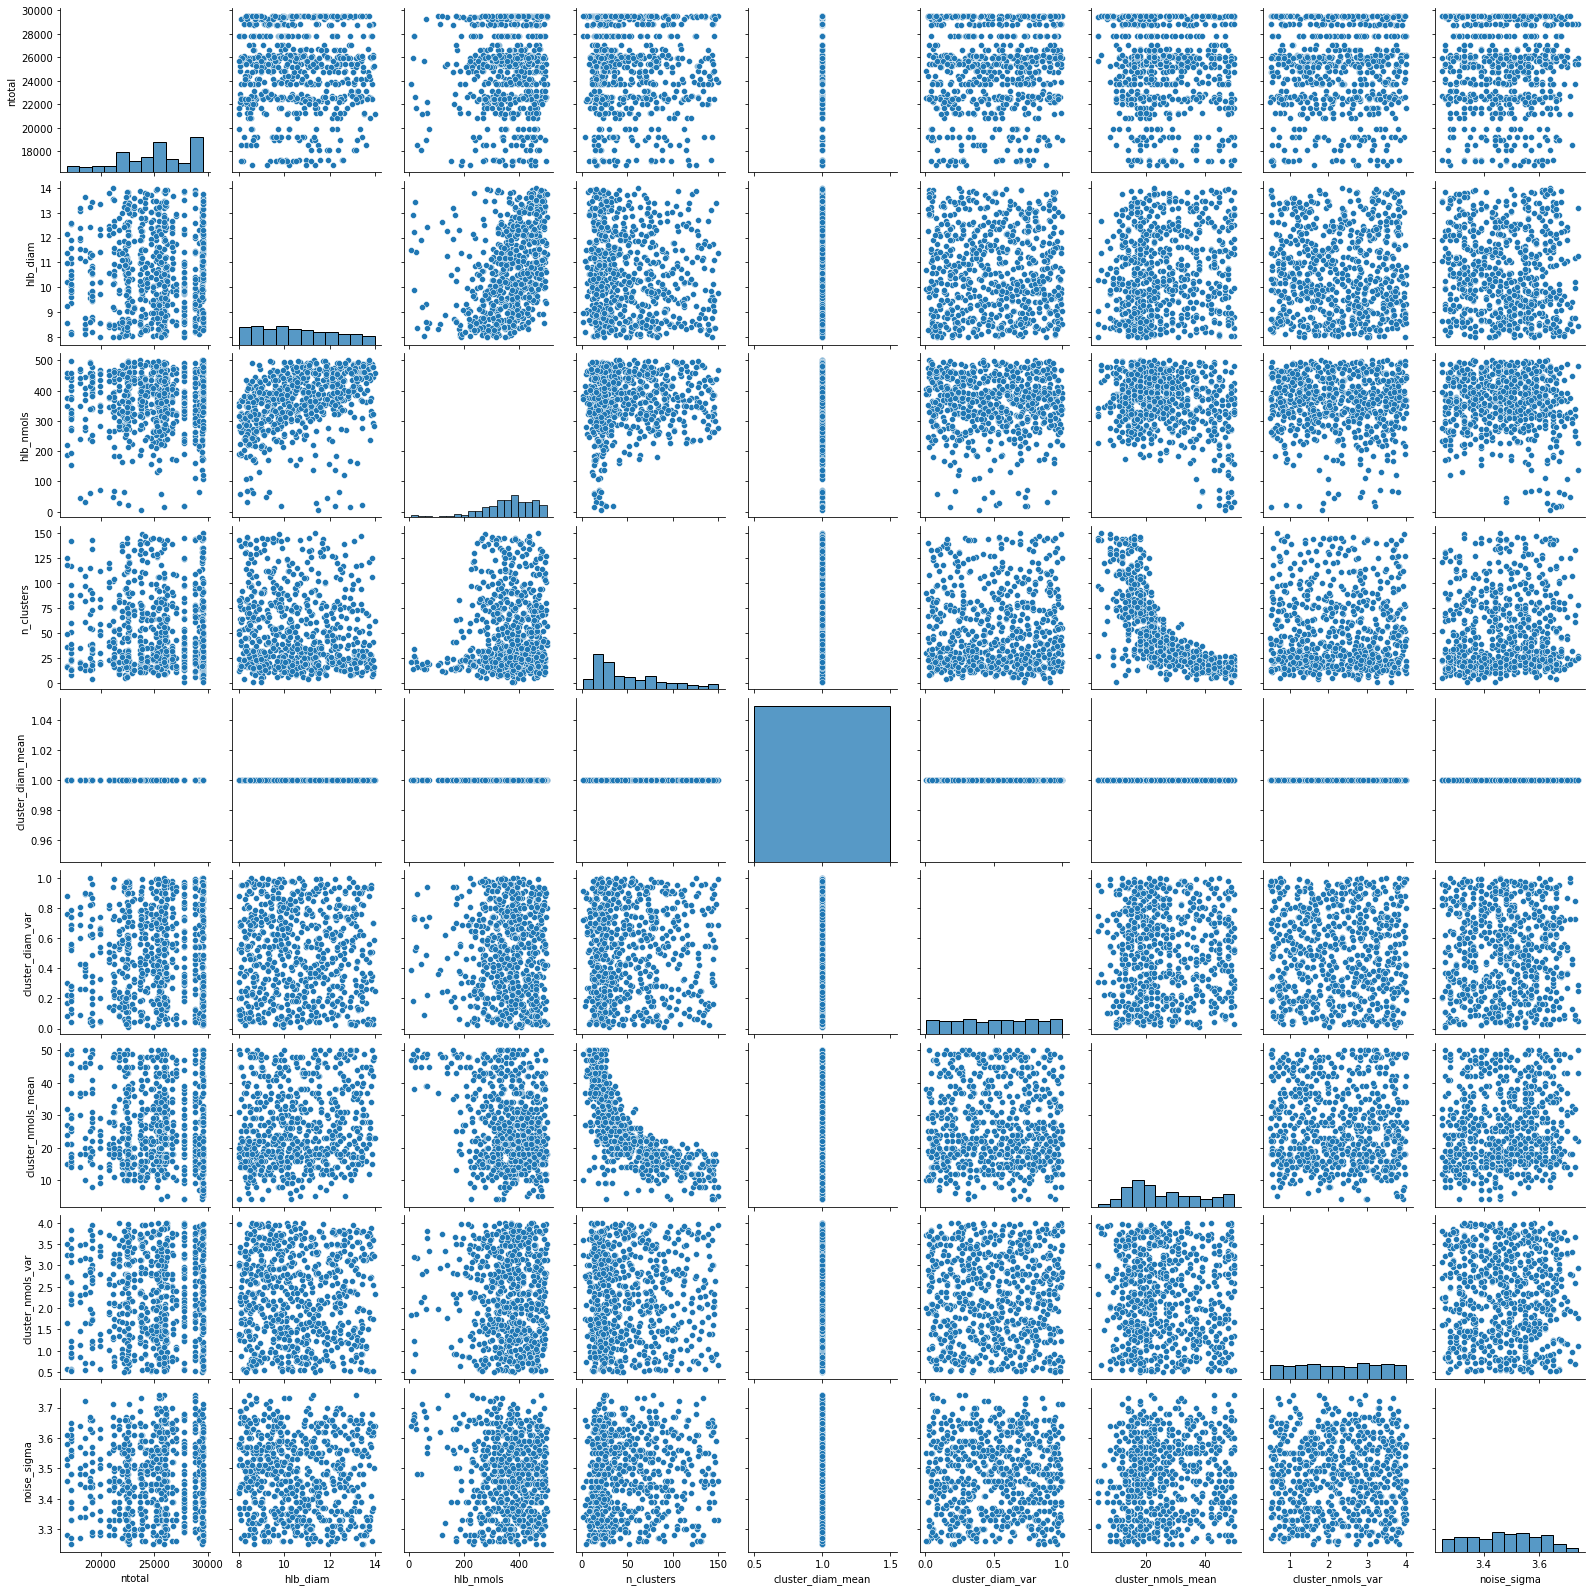

In [21]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-2__20220601-realreal-simsim__20220529-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-val_pjOKQDXm__20220601-realreal-simsim__20220529-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius(em1, files1, em2, files2, 0.5))
print(df.shape)
sn.pairplot(df)